# Ioannou_Georgios


## Copyright © 2022 by Georgios Ioannou


___
<h1 align="center"> Neural Networks </h1>


___
<h2 align="center"> Libraries </h2>


In [1]:
# Import libraries.

import matplotlib.pyplot as plt # Plotting/Visualization.
import pandas as pd             # Data handling.
import tensorflow as tf         # Tensorflow.

from keras.applications import vgg19                 # A pretrained model for transfer learning.
from keras.models import Model                       # A pretrained model for transfer learning.
from sklearn import datasets                         # Utilities to load datasets.
from tensorflow import keras                         # Keras.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense # Layers for our neural networks.

# Print the version of TensorFlow that is installed on my system.

print(tf.__version__)


2.6.4


___
You're going to use a Neural Network to make predictions on the MNIST Fashion data set.  Check out the documentation here, make sure you check the size of the images and how many classes are in the data set https://keras.io/api/datasets/fashion_mnist/
___


4431872/4422102 [==============================] - 0s 0us/step
X_train.shape (60000, 28, 28)
X_test.shape (10000, 28, 28)
y_train.shape (60000,)
y_test.shape (10000,)


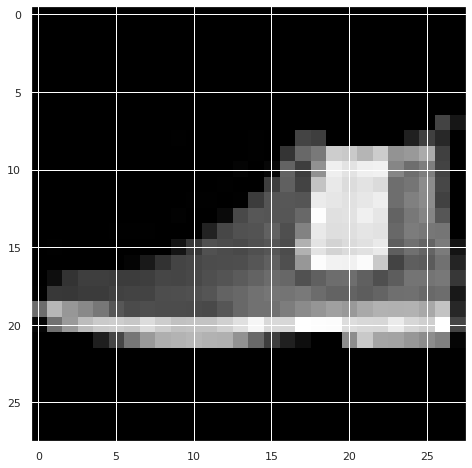

In [2]:
# Load the fashion mnist data set using tf.keras.datasets.fashion_mnist.load_data()

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

plt.figure(figsize=(8,8))

img = X_train[111]

img = img.reshape(28,28)

plt.imshow(img, cmap='gray')

print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)


In [3]:
# Divide the values by 255 and reshape.

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 28, 28, 1)
y_train = y_train.reshape(-1)

X_test = X_test.reshape(-1, 28, 28, 1)
y_test - y_test.reshape(-1)

print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)


X_train.shape (60000, 28, 28, 1)
X_test.shape (10000, 28, 28, 1)
y_train.shape (60000,)
y_test.shape (10000,)


In [4]:
# Build the architecture of your model using Sequential().

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(input_shape=(28, 28, 1),filters=28,kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=28,kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2, 2))

model.add(tf.keras.layers.Conv2D(filters=28,kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=28,kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2, 2))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

print(model.summary())


2022-11-28 11:49:36.401246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 11:49:36.553866: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 11:49:36.554721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 28)        7084      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 28)        7084      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 28)          7084      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 28)          0         
_________________________________________________________________
flatten (Flatten)            (None, 448)               0

2022-11-28 11:49:36.556405: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-28 11:49:36.556734: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 11:49:36.557410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 11:49:36.558089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [5]:
# Fit your model.

history_callback_object = model.fit(X_train, y_train, epochs=12, validation_split=0.1)


2022-11-28 11:49:39.620261: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/12


2022-11-28 11:49:41.094080: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1688/1688 [==============================] - 14s 4ms/step - loss: 0.4921 - acc: 0.8160 - val_loss: 0.3559 - val_acc: 0.8652
Epoch 2/12
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3093 - acc: 0.8869 - val_loss: 0.2923 - val_acc: 0.8905
Epoch 3/12
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2656 - acc: 0.9019 - val_loss: 0.2633 - val_acc: 0.9033
Epoch 4/12
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2376 - acc: 0.9126 - val_loss: 0.2682 - val_acc: 0.9045
Epoch 5/12
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2151 - acc: 0.9206 - val_loss: 0.2647 - val_acc: 0.9058
Epoch 6/12
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1968 - acc: 0.9264 - val_loss: 0.2401 - val_acc: 0.9135
Epoch 7/12
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1804 - acc: 0.9326 - val_loss: 0.2548 - val_acc: 0.9125
Epoch 8/12
1688/1688 [==============================] - 6s 4ms/step - lo

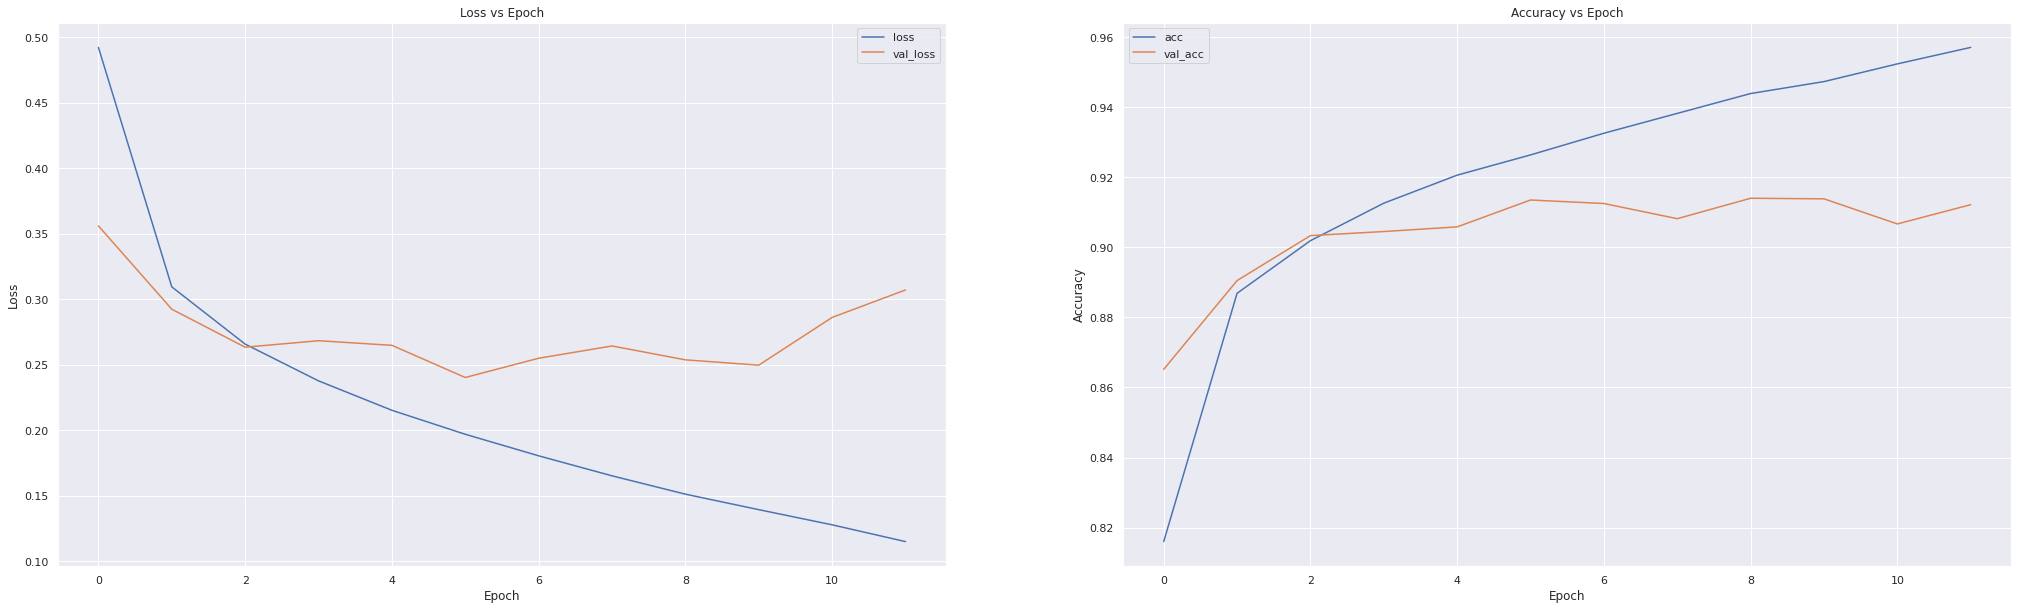

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [6]:
# Display the loss and acc graphs.

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(history_callback_object.history['loss'], label = 'loss')
ax1.plot(history_callback_object.history['val_loss'], label = 'val_loss')
ax1.legend()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss vs Epoch')
ax1.grid(True)

ax2.plot(history_callback_object.history['acc'], label = 'acc')
ax2.plot(history_callback_object.history['val_acc'], label = 'val_acc')
ax2.legend()
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy vs Epoch')
ax2.grid(True)

fig.set_figheight(10)
fig.set_figwidth(35)
plt.show()

history_callback_object.history.keys()

In [7]:
# Evaluate your results.

print('Accuracy of model on test data: ', model.evaluate(X_test, y_test)[1] * 100 , '%', sep = '')

model_loss, model_accuracy = model.evaluate(X_test, y_test)

print('Model Test Loss: %f' % (model_loss))
print('Model Test Loss: %f' % (model_loss * 100), '%\n', sep = '')
print('Model Test Accuracy: %f' % (model_accuracy))
print('Model Test Accuracy: %f' % (model_accuracy * 100), '%', sep = '')


313/313 [==============================] - 1s 2ms/step - loss: 0.3210 - acc: 0.9092
Accuracy of model on test data: 90.92000126838684%
313/313 [==============================] - 1s 2ms/step - loss: 0.3210 - acc: 0.9092
Model Test Loss: 0.321049
Model Test Loss: 32.104930%

Model Test Accuracy: 0.909200
Model Test Accuracy: 90.920001%
